<a href="https://colab.research.google.com/github/nshkwon/Side-ML-Projects/blob/main/3_Customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv

# Part 1: Data preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/segmentation data.csv')

In [ ]:
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
dataset.shape

(2000, 8)

In [ ]:
dataset.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
# categorical columns
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
# numerical columns
dataset.select_dtypes(include=['int64','float64']).columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [ ]:
dataset.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
# missing values
dataset.isnull().values.any()

False

In [ ]:
dataset = dataset.drop(columns='ID')

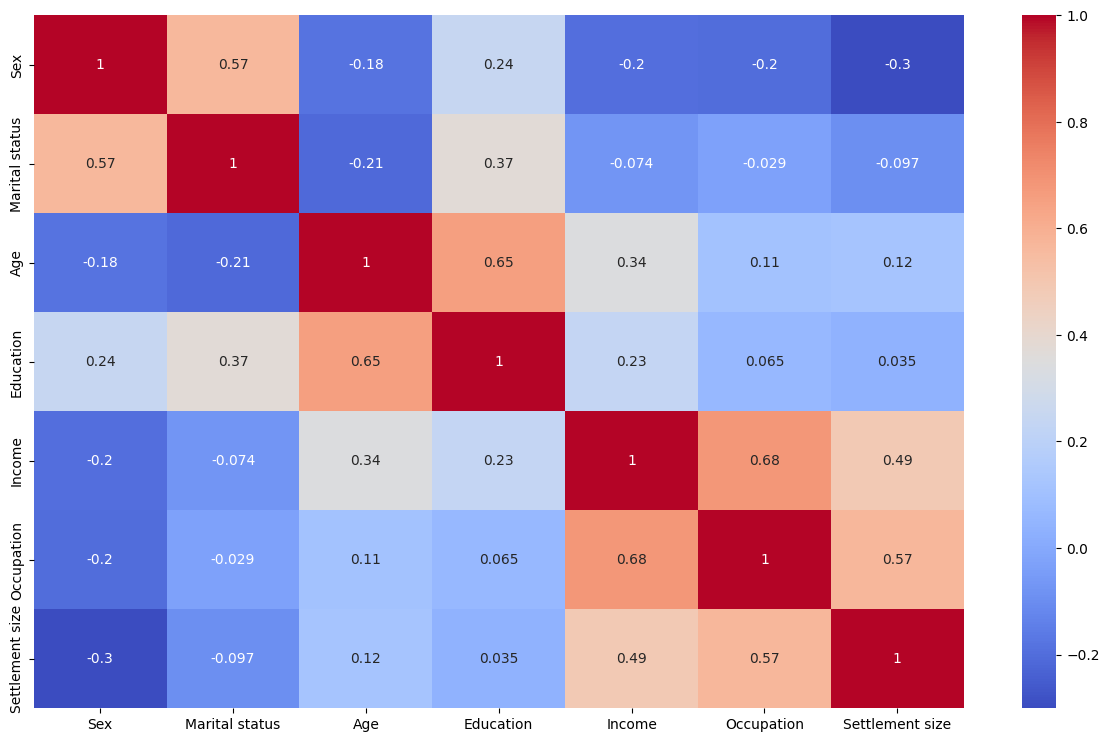

In [ ]:
#heatmap
corr = dataset.corr()
plt.figure(figsize=(15,9))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
# Feature scaling

In [ ]:
df = dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,20):
  kmeans= KMeans(n_clusters=i, init ='k-means++')
  kmeans.fit(dataset)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

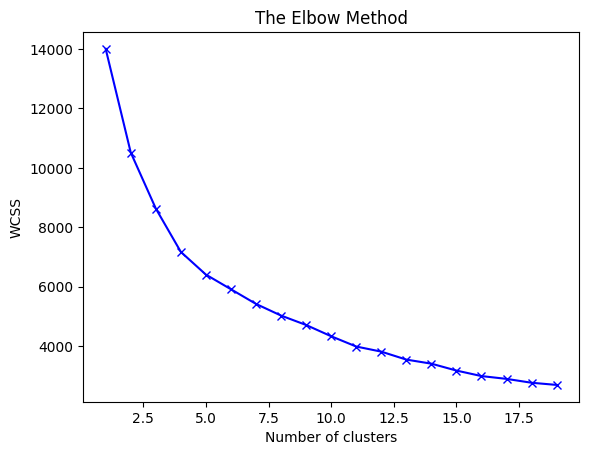

In [ ]:
plt.plot(range(1,20), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# from the graph, we can tell the optimal value of K is about 4 or 5. I'll use 5 as K for this case.

# Part 2: Building the model

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [ ]:
y_kmeans = kmeans.fit_predict(dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([2, 4, 3, ..., 3, 1, 3], dtype=int32)

In [ ]:
## Cluster Visulaization

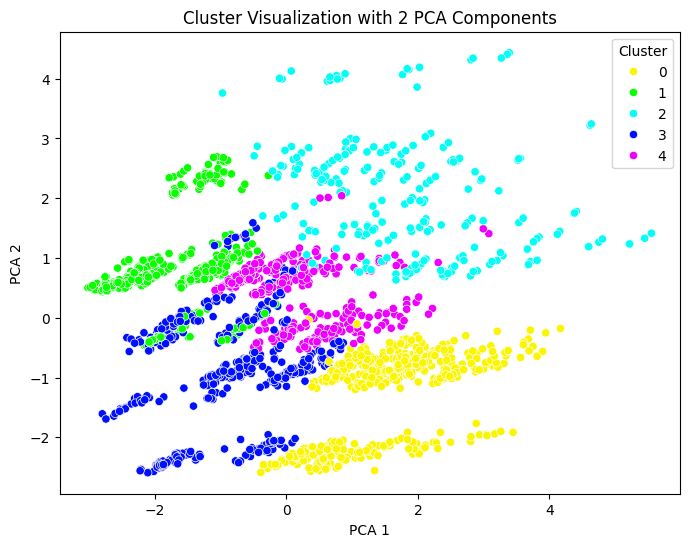

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset)

# Ensure y_kmeans is 1-dimensional
y_kmeans_1d = y_kmeans.ravel()

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset_pca[:, 0], y=dataset_pca[:, 1], hue=y_kmeans_1d, palette=sns.color_palette("hsv", 5))
plt.title('Cluster Visualization with 2 PCA Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# Ensure the legend correctly interprets 'y_kmeans_1d' as categorical data
plt.legend(title='Cluster', loc='best')
plt.show()

# Part 3: Getting the output

In [ ]:
y_kmeans.shape

(2000,)

In [ ]:
y_kmeans =  y_kmeans.reshape(len(y_kmeans), 1)

In [ ]:
b = np.concatenate((y_kmeans, df), axis=1)

In [ ]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [ ]:
df_final = pd.DataFrame(data=b, columns = ['Cluster_number', 'Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'])

In [ ]:
df_final.head()

,Cluster_number,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,2,0,0,67,2,124670,1,2
1,4,1,1,22,1,150773,1,2
2,3,0,0,49,1,89210,0,0
3,0,0,0,45,1,171565,1,1
4,0,0,0,53,1,149031,1,1


In [ ]:
df_final

,Cluster_number,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,2,0,0,67,2,124670,1,2
1,4,1,1,22,1,150773,1,2
2,3,0,0,49,1,89210,0,0
3,0,0,0,45,1,171565,1,1
4,0,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,3,1,0,47,1,123525,0,0
1996,1,1,1,27,1,117744,1,0
1997,3,0,0,31,0,86400,0,0
1998,1,1,1,24,1,97968,0,0


In [ ]:
## cluster interpretation

        Sex  Marital status        Age  Education         Income  Occupation  \
0  0.004274   -6.106227e-16  36.927350   0.675214  141806.596154    1.252137   
1  0.834034    1.000000e+00  30.733193   1.123950   97098.056723    0.399160   
2  0.471545    6.747967e-01  56.016260   2.146341  160517.764228    1.174797   
3  0.362031    1.276756e-15  35.527594   0.743929   98133.229581    0.335541   
4  0.658263    9.831933e-01  28.103641   1.008403  127123.117647    1.131653   

   Settlement size  
0         1.512821  
1         0.004202  
2         1.150407  
3         0.041943  
4         1.305322  


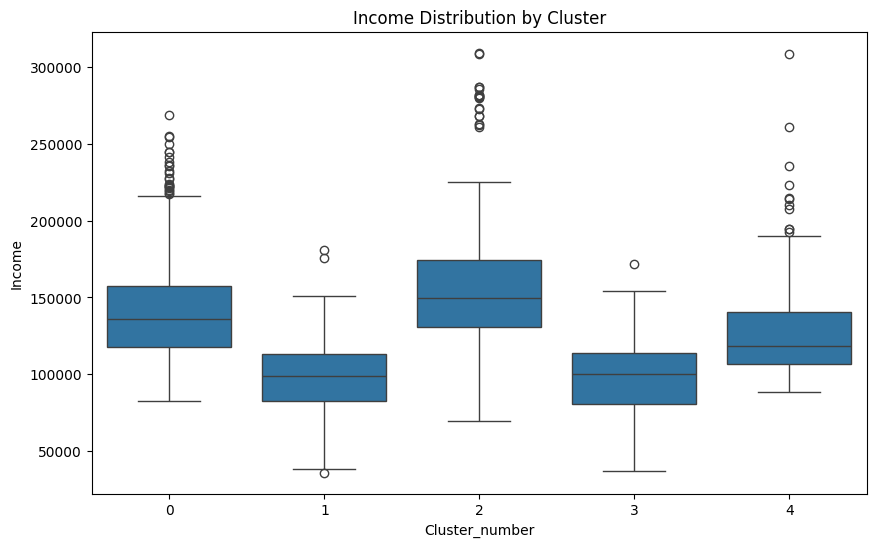

In [ ]:
# Cluster centroids in the original feature space
centroids = sc.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=df.columns)
print(centroids_df)

# Distribution of a 'Income' feature within clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_number', y='Income', data=df_final)
plt.title('Income Distribution by Cluster')
plt.show()

# Coming back soon to continue

In [ ]:
# back soon to handle outliers and increase the performance